# Оценка отзывов

# Видеодемонстрация автоматического сбора информациии с сайта

In [20]:
from IPython.display import Video
Video("data/scraping demo.mp4",width=800,height=600)

In [3]:
import pandas as pd
import plotly.express as px
import numpy as np

In [2]:
%pip install pandas
%pip install plotly
%

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Анализ информации

In [4]:
rost_reviews = pd.read_csv("data/Ростикс_тональность.csv")

In [5]:
rost_reviews.head(4)

,Unnamed: 0,review_url,author,review_date,text_data,neutral,negative,positive
0,0,https://barnaul.flamp.ru/firm/kfc_restoran_bys...,\n\t\tПлюшка\n\t,\n\t20 июня в 20:20\n\t,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\t\tСего...",0.222710,0.000000,0.414909
1,1,https://barnaul.flamp.ru/firm/kfc_restoran_bys...,\n\t\tBoris Burned\n\t,\n\t9 апреля в 20:47\n\t\t,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\tВзял п...",0.307368,0.370235,0.000000
2,2,https://barnaul.flamp.ru/firm/kfc_restoran_bys...,\n\t\thorhio_bob\n\t,\n\t10 апреля в 15:08\n\t\t,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\tнравят...",0.228166,0.177821,0.000000
3,3,https://barnaul.flamp.ru/firm/kfc_restoran_bys...,\n\t\tПлюшка\n\t,\n\t16 февраля в 20:46\n\t,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\t\tСкол...",0.212079,0.000000,0.245095


In [6]:
sport_reviews = pd.read_csv("data/Спортмастер_тональность.csv")

In [7]:
sport_reviews.head(4)

,Unnamed: 0,review_url,author,review_date,text_data,neutral,negative,positive
0,0,https://chita.flamp.ru/firm/sportmaster_magazi...,\n\t\tЖимолость Ореховна\n\t,\n\t\t,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\tБыла с...",0.334599,0.000000,0.50001
1,1,https://chita.flamp.ru/firm/sportmaster_magazi...,\n\t\tИван Пет\n\t,\n\t22 января 2022\n\t,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\tРазоча...",0.782673,0.206904,0.00000
2,2,https://chita.flamp.ru/firm/sportmaster_magazi...,\n\t\tAlexey Volkov\n\t,\n\t11 июля 2018\n\t,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\tПокупа...",0.334599,0.430157,0.00000
3,3,https://chita.flamp.ru/firm/sportmaster_magazi...,\n\t\tdimazarazza\n\t,\n\t27 апреля 2020\n\t\t,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\tПришел...",0.724880,0.222710,0.00000


In [8]:
def fix_reviews(input_df):
    df = input_df.copy()
    df["review_date"] = df["review_date"].str.replace('\n','')
    df["review_date"] = df["review_date"].str.replace('\t','')
    maps = {
        "января": "01",
        "февраля": "02",
        "марта": "03",
        "апреля": "05",
        "июня": "06",
        "июля": "07",
        "августа": "08",
        "сентября": "09",
        "октября": "10",
        "ноября": "11",
        "декабря": "12",
    }

    for k,v in maps.items():
        df["review_date"] = df["review_date"].str.replace(k,v)

    df["review_date"] = df["review_date"].str.replace(r'в\s\d*:\d*', '2023', regex=True)
    df["review_date"] = df["review_date"].str.replace(' ', '.')
    df["review_date"] = pd.to_datetime(df["review_date"],errors="coerce")
    df = df[~df["review_date"].isnull()]
    return df

In [9]:
rost_reviews = fix_reviews(rost_reviews)
sport_reviews = fix_reviews(sport_reviews)

C:\Users\Daily\AppData\Local\Temp\ipykernel_17200\1925058989.py:24: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["review_date"] = pd.to_datetime(df["review_date"],errors="coerce")
C:\Users\Daily\AppData\Local\Temp\ipykernel_17200\1925058989.py:24: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["review_date"] = pd.to_datetime(df["review_date"],errors="coerce")


In [10]:
rost_reviews = rost_reviews.sort_values(["review_date"])
rost_reviews.head(10)


,Unnamed: 0,review_url,author,review_date,text_data,neutral,negative,positive
13809,13809,https://novosibirsk.flamp.ru/firm/kfc_restoran...,\n\t\tIrin4ik\n\t,2011-03-29,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\tВредна...",0.000000,0.156115,0.974053
13816,13816,https://novosibirsk.flamp.ru/firm/kfc_restoran...,\n\t\ttitova.e.s\n\t,2011-05-25,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\tВот ск...",0.000000,0.712242,0.000000
13810,13810,https://novosibirsk.flamp.ru/firm/kfc_restoran...,\n\t\tNata\n\t,2011-05-25,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\tу меня...",0.724880,0.000000,0.112805
7557,7557,https://krasnoyarsk.flamp.ru/firm/kfc_restoran...,\n\t\tovsyanka\n\t,2011-06-02,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\tдоклад...",0.217348,0.000000,0.453272
13806,13806,https://novosibirsk.flamp.ru/firm/kfc_restoran...,\n\t\tdreаm\n\t,2011-06-15,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\tТакое ...",0.000000,0.523430,0.177821
13799,13799,https://novosibirsk.flamp.ru/firm/kfc_restoran...,\n\t\tОлеся Шамова\n\t,2011-06-25,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\t\tВ Ро...",0.000000,0.314061,0.000000
13797,13797,https://novosibirsk.flamp.ru/firm/kfc_restoran...,\n\t\tCaso\n\t,2011-07-14,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\t\tИног...",0.300756,0.000000,0.182436
13801,13801,https://novosibirsk.flamp.ru/firm/kfc_restoran...,\n\t\tserg-al-tol\n\t,2011-07-25,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\tРостик...",0.000000,0.000000,0.262852
13795,13795,https://novosibirsk.flamp.ru/firm/kfc_restoran...,\n\t\tВероника\n\t,2011-08-03,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\t\tРеши...",0.523430,0.275140,0.000000
7561,7561,https://krasnoyarsk.flamp.ru/firm/kfc_restoran...,\n\t\tSangria\n\t,2011-08-04,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\tТвисте...",0.000000,0.000000,0.362979


In [11]:
sport_reviews = sport_reviews.sort_values(["review_date"])
sport_reviews.head(10)

,Unnamed: 0,review_url,author,review_date,text_data,neutral,negative,positive
14,14,https://chita.flamp.ru/firm/sportmaster_magazi...,\n\t\tBardak\n\t,2013-08-01,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\tПонрав...",0.314061,0.000000,0.484390
16,16,https://chita.flamp.ru/firm/sportmaster_magazi...,\n\t\tdimazarazza\n\t,2013-08-08,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\t\tАссо...",0.766304,0.182436,0.000000
12,12,https://chita.flamp.ru/firm/sportmaster_magazi...,\n\t\tklanna\n\t,2014-10-15,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\t\tБыли...",0.476590,0.222710,0.000000
10,10,https://chita.flamp.ru/firm/sportmaster_magazi...,\n\t\tOzborshik\n\t,2015-06-12,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\t\tСраз...",0.392347,0.000000,0.256842
13,13,https://chita.flamp.ru/firm/sportmaster_magazi...,\n\t\tferbi.ferbi2015\n\t,2015-11-14,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\t\tОбсл...",0.492198,0.262852,0.000000
7,7,https://chita.flamp.ru/firm/sportmaster_magazi...,\n\t\tМихалыч\n\t,2017-06-16,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\t\tУжас...",0.461027,0.320831,0.000000
11,11,https://chita.flamp.ru/firm/sportmaster_magazi...,\n\t\tNatalya Zimina\n\t,2017-10-31,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\tОбслуж...",0.515630,0.334599,0.000000
2,2,https://chita.flamp.ru/firm/sportmaster_magazi...,\n\t\tAlexey Volkov\n\t,2018-07-11,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\tПокупа...",0.334599,0.430157,0.000000
3,3,https://chita.flamp.ru/firm/sportmaster_magazi...,\n\t\tdimazarazza\n\t,2020-05-27,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\tПришел...",0.724880,0.222710,0.000000
4,4,https://chita.flamp.ru/firm/sportmaster_magazi...,\n\t\tАльбина Андреевна\n\t,2022-01-06,"<p class=""t-rich-text__p"">\n\t\t\t\t\t\tПочему...",0.859674,0.222710,0.000000


In [12]:
df = rost_reviews[rost_reviews["review_date"].dt.year >= 2023].copy()
df["month"] = df["review_date"].dt.month
df_group = df.groupby(["month"]).agg(
    {"positive": "mean", "negative": "mean", "neutral": "mean","review_date": "first"}).reset_index()


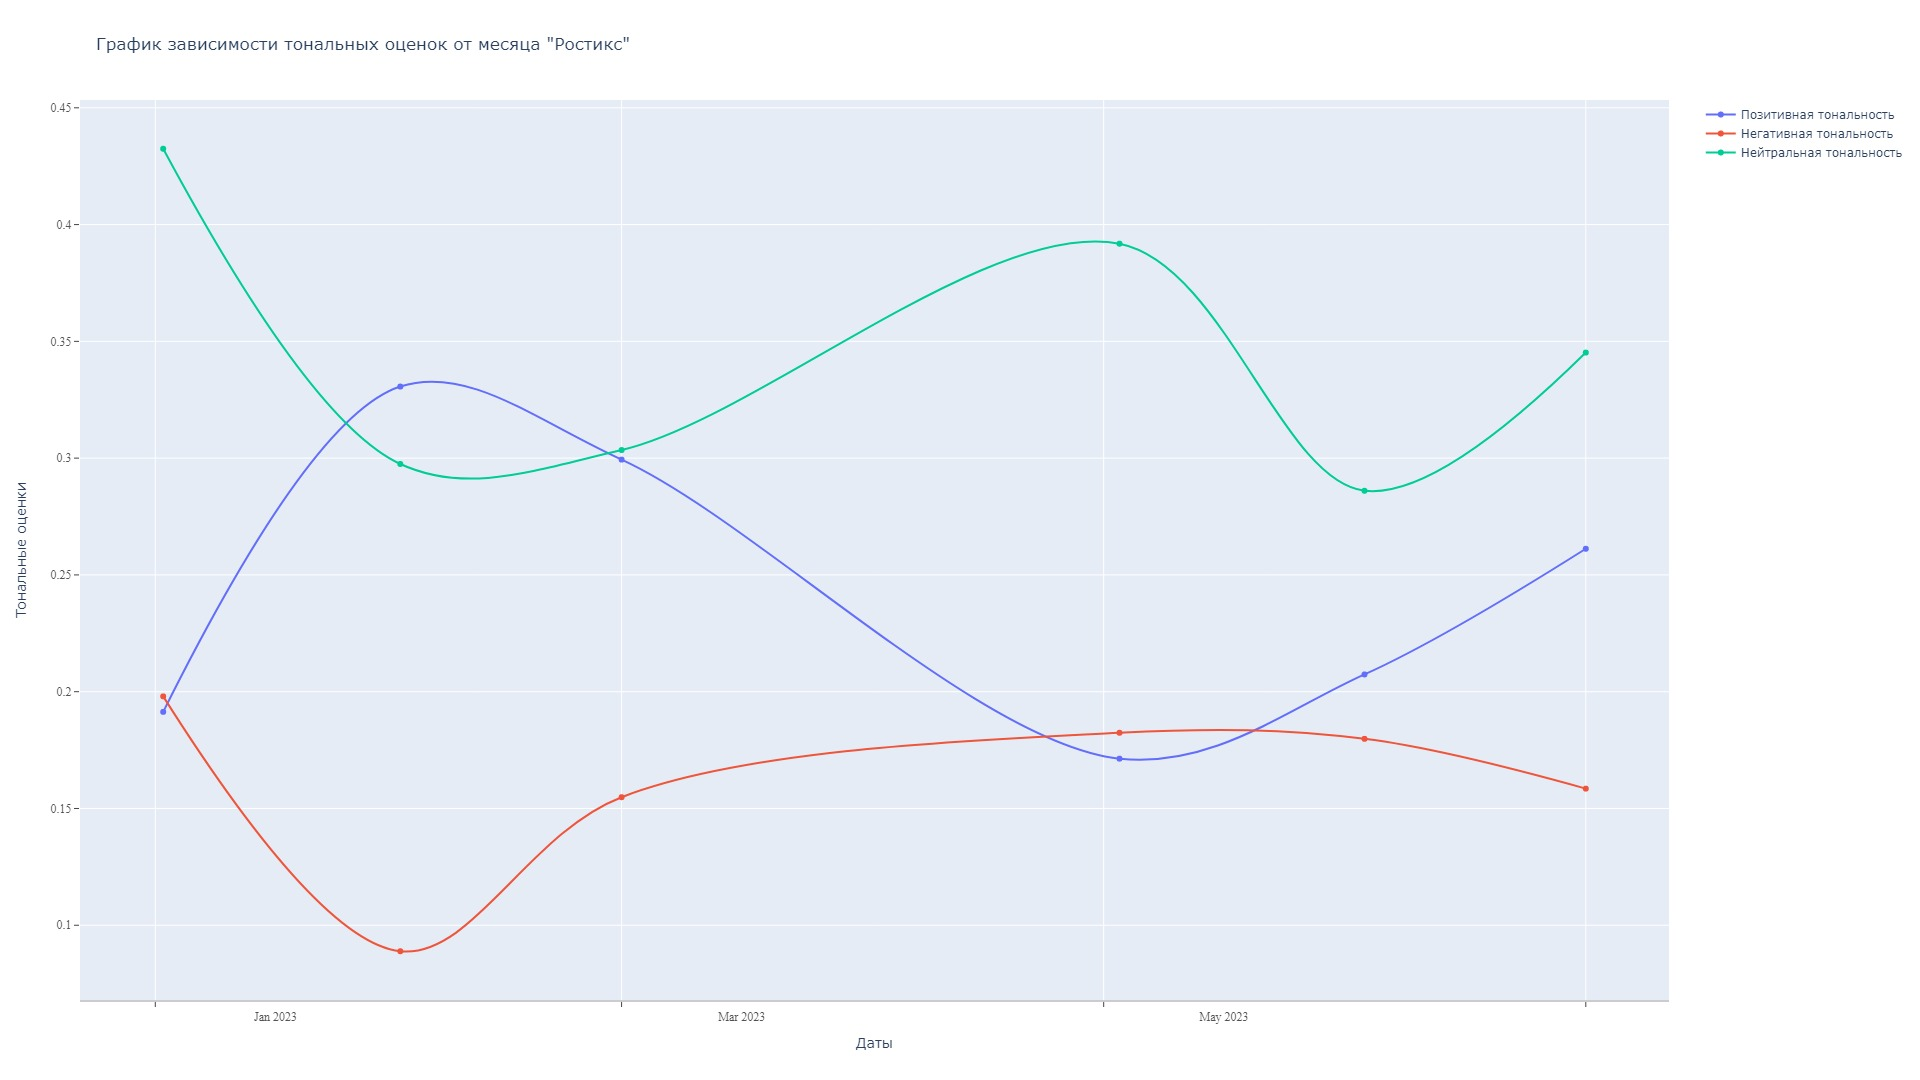

In [13]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_group["review_date"], y=df_group["positive"], name="Позитивная тональность",
                         line_shape='spline'))
fig.add_trace(go.Scatter(x=df_group["review_date"], y=df_group["negative"], name="Негативная тональность",
                         line_shape='spline'))

fig.add_trace(go.Scatter(x=df_group["review_date"], y=df_group["neutral"], name="Нейтральная тональность",
                         line_shape='spline'))


fig.update_layout(title="График зависимости тональных оценок от месяца \"Ростикс\"",
                  xaxis_title='Даты', yaxis_title='Тональные оценки',
                  xaxis=dict(
                      showticklabels=True,
                      linecolor='rgb(204, 204, 204)',
                      linewidth=2,
                      tickmode='linear',
                      ticks='outside',
                      dtick="M2",
                      ticklabelmode="period",
                      tickfont=dict(
                          family='Times New Roman',
                          size=12,
                          color='rgb(82, 82, 82)',
                      )),
                  yaxis=dict(
                      tickmode='linear',
                      ticks='outside',
                      tick0=0,
                      dtick=0.05,
                      tickfont=dict(
                          family='Times New Roman',
                          size=12,
                          color='rgb(82, 82, 82)',
                      )))
fig.show("jpeg",width=1920,height=1080)

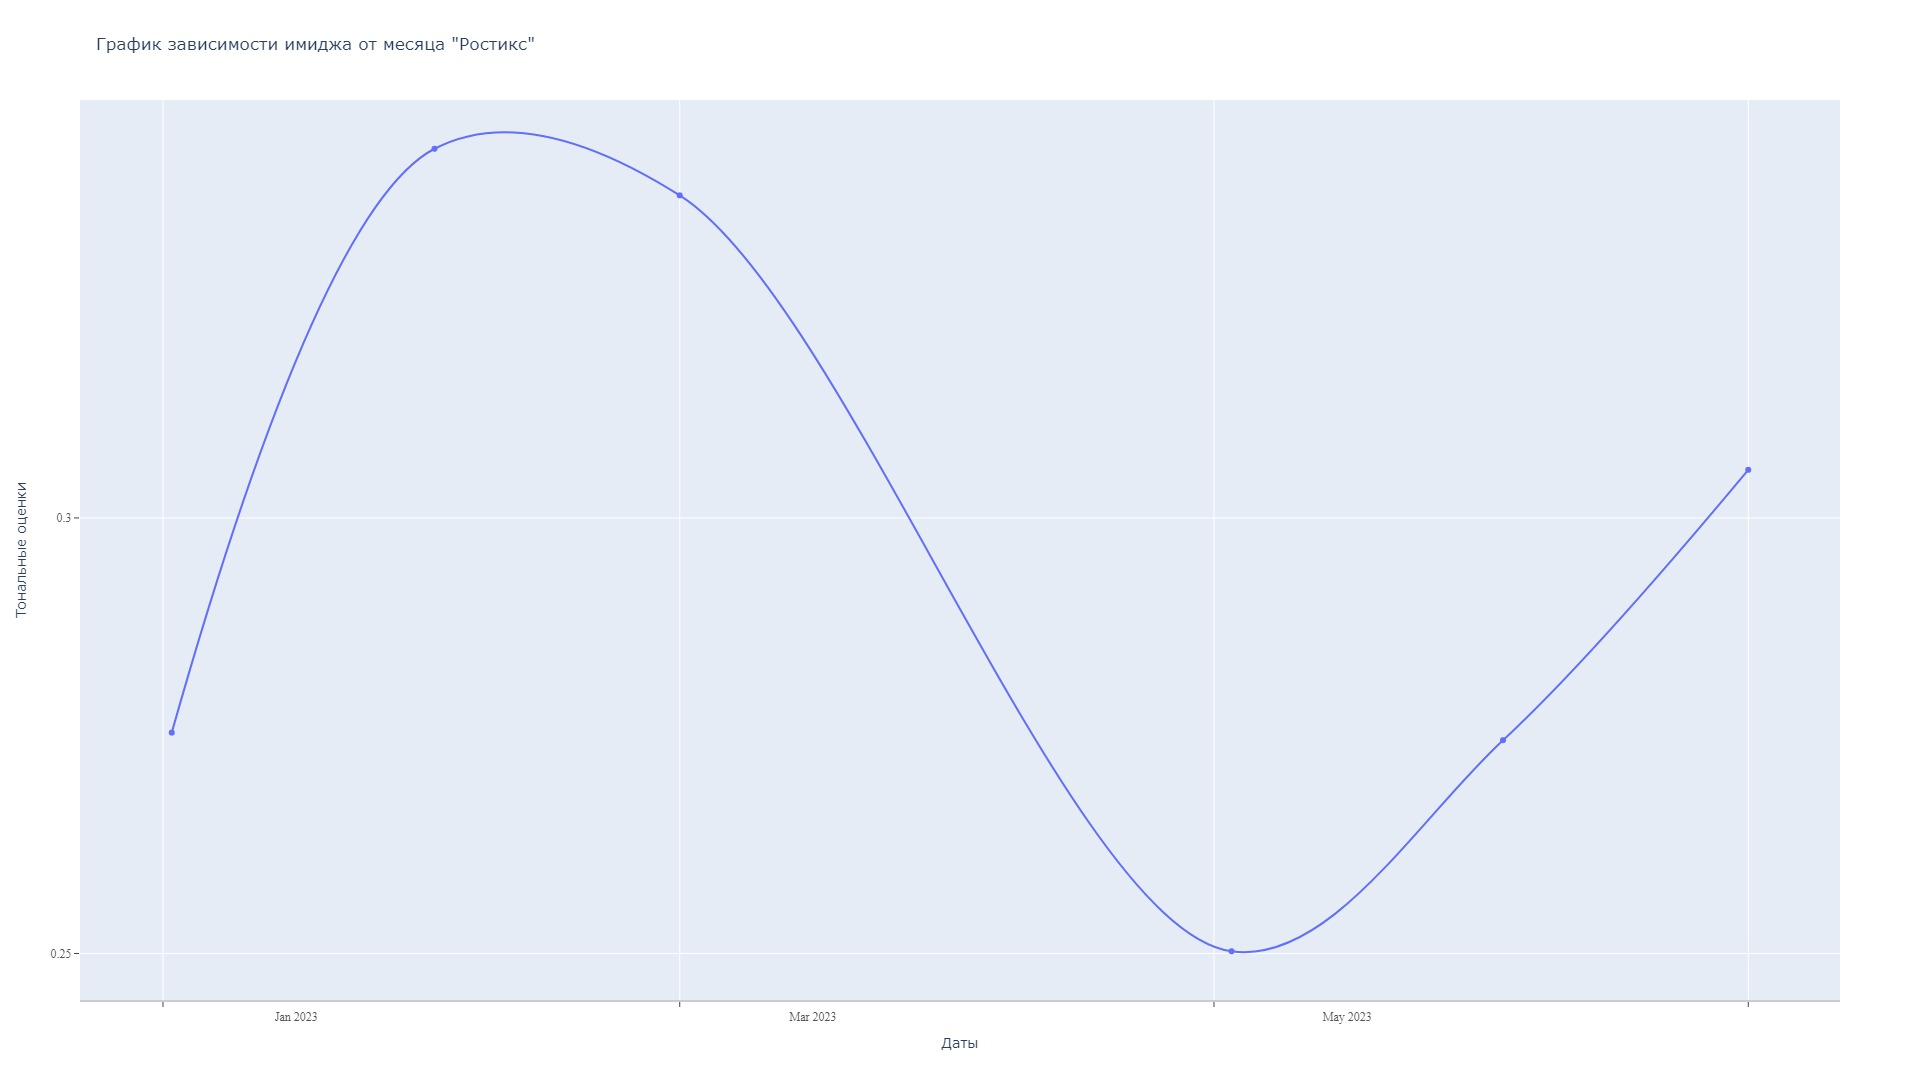

In [14]:
w1 = w2 = w3 = 1
w2 = 0
df_group['grade'] = np.sqrt(w1*(df_group['positive']**2)+w2*(df_group['neutral']**2)+w3 *
                      (df_group['negative']**2))
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_group["review_date"], y=df_group["grade"], name="Позитивная тональность",
                         line_shape='spline'))


fig.update_layout(title="График зависимости имиджа от месяца \"Ростикс\"",
                  xaxis_title='Даты', yaxis_title='Тональные оценки',
                  xaxis=dict(
                      showticklabels=True,
                      linecolor='rgb(204, 204, 204)',
                      linewidth=2,
                      tickmode='linear',
                      ticks='outside',
                      dtick="M2",
                      ticklabelmode="period",
                      tickfont=dict(
                          family='Times New Roman',
                          size=12,
                          color='rgb(82, 82, 82)',
                      )),
                  yaxis=dict(
                      tickmode='linear',
                      ticks='outside',
                      tick0=0,
                      dtick=0.05,
                      tickfont=dict(
                          family='Times New Roman',
                          size=12,
                          color='rgb(82, 82, 82)',
                      )))
fig.show("jpeg",width=1920,height=1080)

In [15]:
df = sport_reviews.copy()
df["month"] = df["review_date"].dt.month
df_group = df.groupby(["month"]).agg(
    {"positive": "mean", "negative": "mean", "neutral": "mean","review_date": "first"}).reset_index()
df_group.sort_values("review_date",inplace=True)

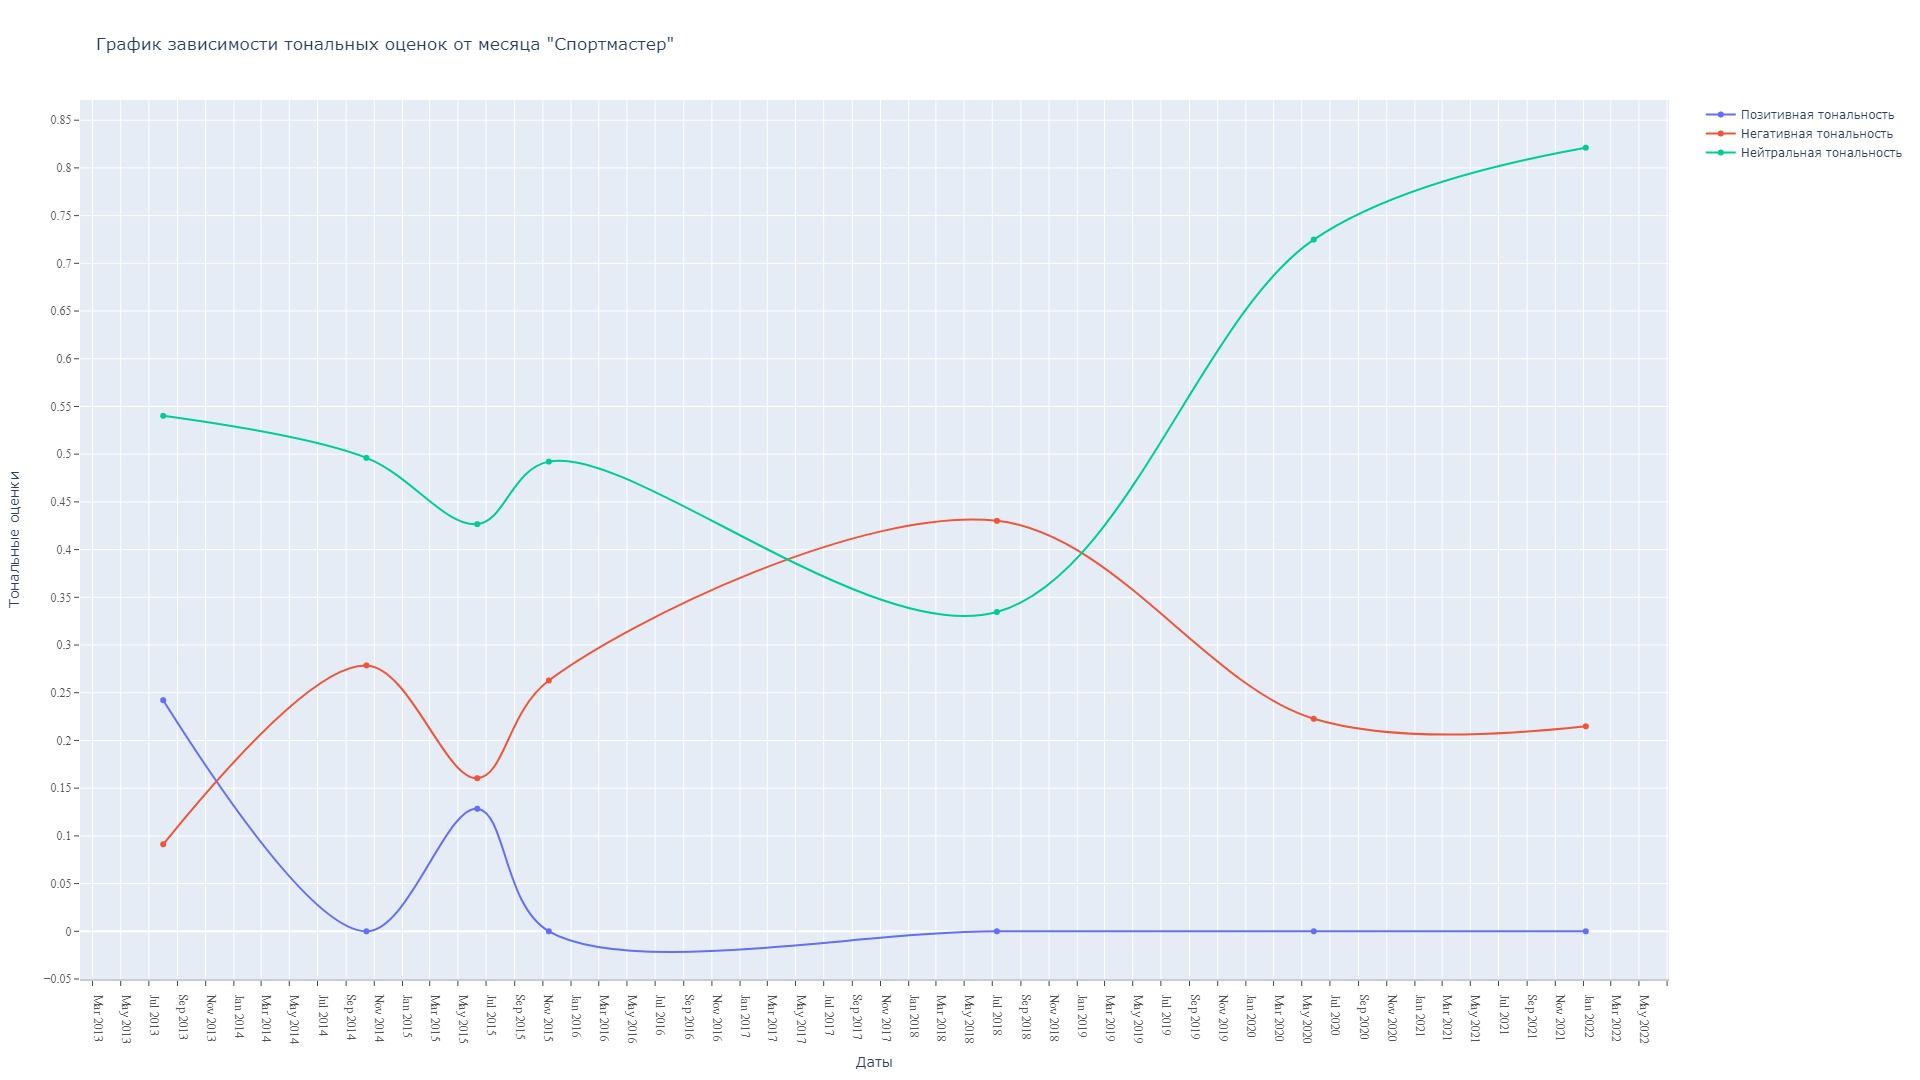

In [16]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_group["review_date"], y=df_group["positive"], name="Позитивная тональность",
                         line_shape='spline'))
fig.add_trace(go.Scatter(x=df_group["review_date"], y=df_group["negative"], name="Негативная тональность",
                         line_shape='spline'))

fig.add_trace(go.Scatter(x=df_group["review_date"], y=df_group["neutral"], name="Нейтральная тональность",
                         line_shape='spline'))


fig.update_layout(title="График зависимости тональных оценок от месяца \"Спортмастер\"",
                  xaxis_title='Даты', yaxis_title='Тональные оценки',
                  xaxis=dict(
                      showticklabels=True,
                      linecolor='rgb(204, 204, 204)',
                      linewidth=2,
                      tickmode='linear',
                      ticks='outside',
                      dtick="M2",
                      ticklabelmode="period",
                      tickfont=dict(
                          family='Times New Roman',
                          size=12,
                          color='rgb(82, 82, 82)',
                      )),
                  yaxis=dict(
                      tickmode='linear',
                      ticks='outside',
                      tick0=0,
                      dtick=0.05,
                      tickfont=dict(
                          family='Times New Roman',
                          size=12,
                          color='rgb(82, 82, 82)',
                      )))
fig.show("jpeg",width=1920,height=1080)


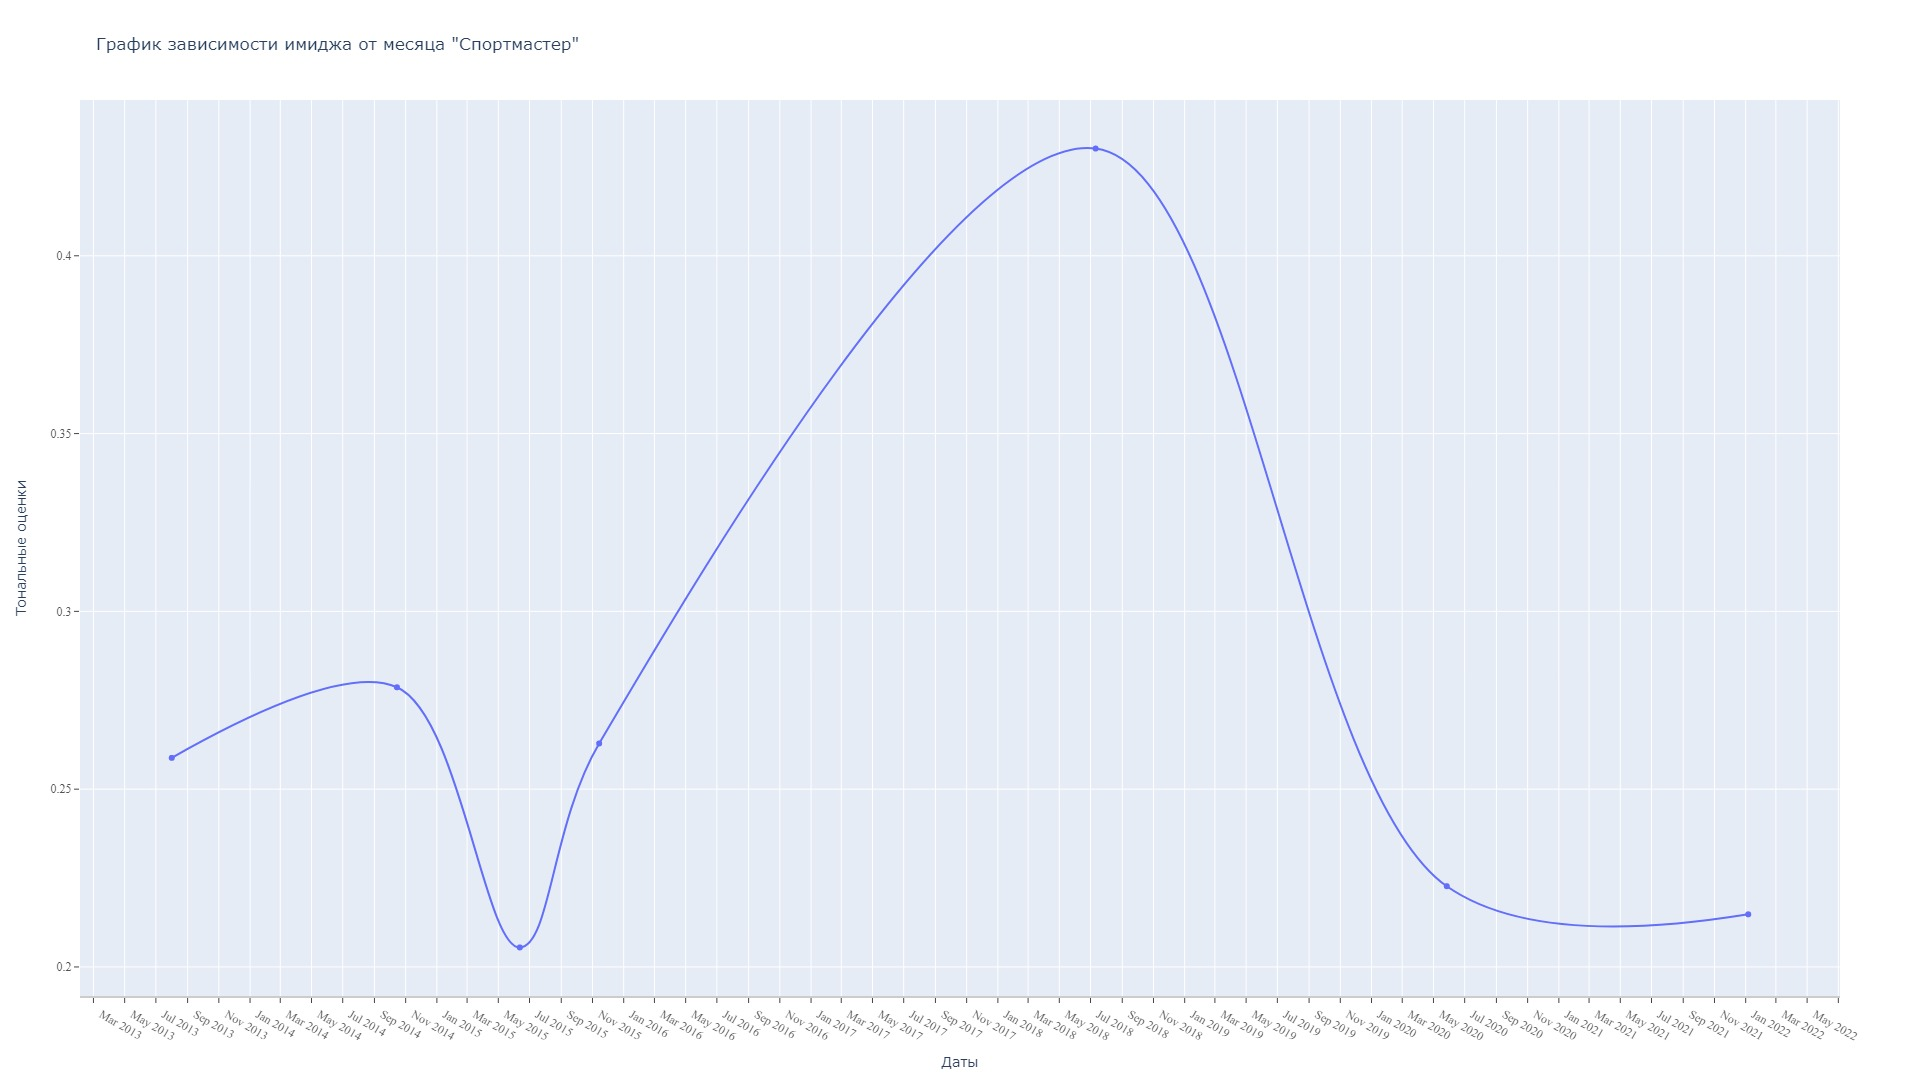

In [17]:
w1 = w2 = w3 = 1
w2 = 0
df_group['grade'] = np.sqrt(w1*(df_group['positive']**2)+w2*(df_group['neutral']**2)+w3 *
                      (df_group['negative']**2))
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_group["review_date"], y=df_group["grade"], name="Позитивная тональность",
                         line_shape='spline'))


fig.update_layout(title="График зависимости имиджа от месяца \"Спортмастер\"",
                  xaxis_title='Даты', yaxis_title='Тональные оценки',
                  xaxis=dict(
                      showticklabels=True,
                      linecolor='rgb(204, 204, 204)',
                      linewidth=2,
                      ticks='outside',
                      dtick="M2",
                      ticklabelmode="period",
                      tickfont=dict(
                          family='Times New Roman',
                          size=12,
                          color='rgb(82, 82, 82)',
                      )),
                  yaxis=dict(
                      tickmode='linear',
                      ticks='outside',
                      tick0=0,
                      dtick=0.05,
                      tickfont=dict(
                          family='Times New Roman',
                          size=12,
                          color='rgb(82, 82, 82)',
                      )))
fig.show("jpeg",width=1920,height=1080)

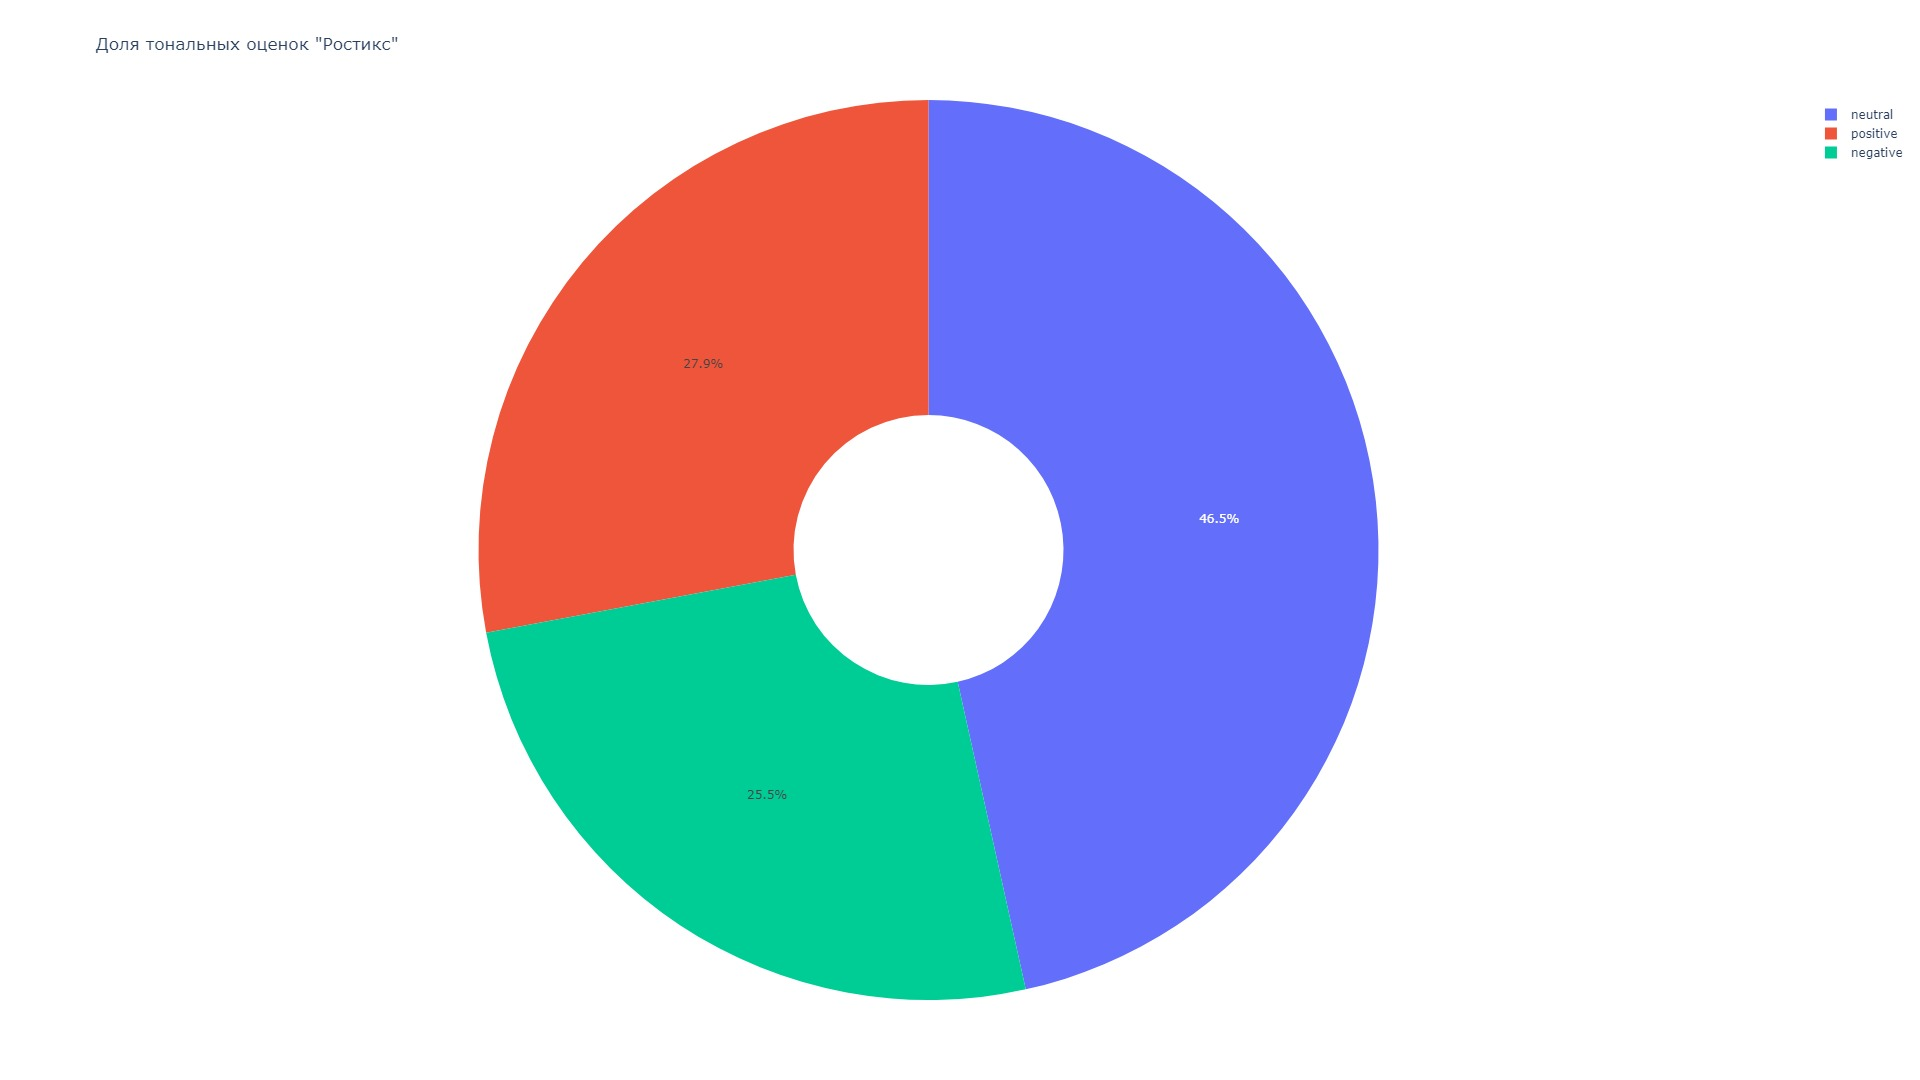

In [18]:
rost_pie_df = rost_reviews.loc[:, ["neutral", "negative", "positive"]].copy()
rost_pie_df = rost_pie_df.mean().reset_index()
rost_pie_df.columns = ["names","values"]

fig = px.pie(rost_pie_df, values='values', names='names', title='Доля тональных оценок \"Ростикс\"', hole=.3)
fig.show("jpeg",width=1920,height=1080)


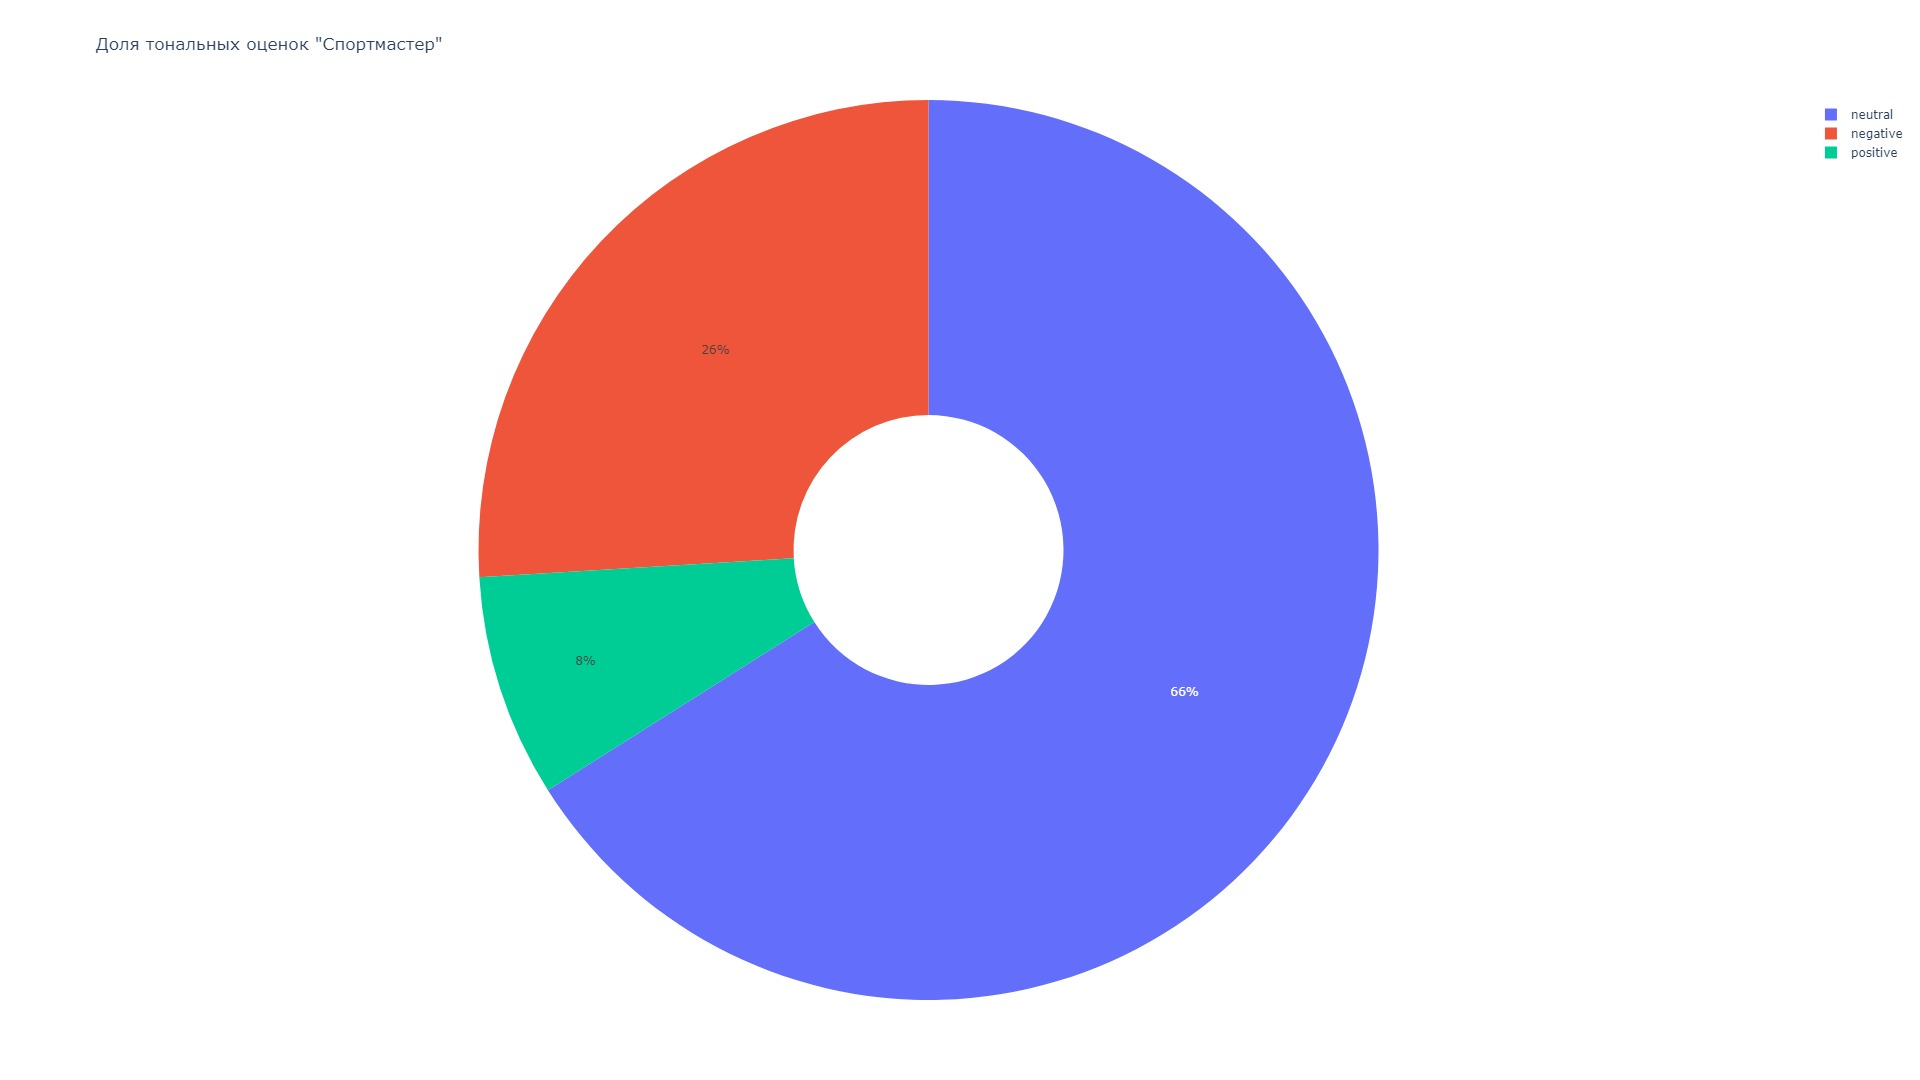

In [19]:
sport_pie_df = sport_reviews.loc[:, ["neutral", "negative", "positive"]].copy()
sport_pie_df = sport_pie_df.mean().reset_index()
sport_pie_df.columns = ["names","values"]

fig = px.pie(sport_pie_df, values='values', names='names', title='Доля тональных оценок \"Спортмастер\"', hole=.3)
fig.show("jpeg",width=1920,height=1080)